<a href="https://colab.research.google.com/github/suyangegrong/pdm08/blob/main/project/pdm_prj01_mid_MLP_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PDM: Project01
- ### data: sklearn이 제공하는 당뇨병 데이터  
- ### analysis:  Keras MLP Regression 


# pandas
## MLP
    * 당뇨병 데이터 MLP 회기 분석 모형

> [참고] https://www.tensorflow.org/tutorials/keras/regression?hl=ko

In [2]:
# import
import matplotlib.pylab as plt
import numpy as np
from sklearn import datasets

In [3]:
#
# pandas
#
########################################
# 당뇨병 데이터 구조 => DataFrame
# Attribute Information:
#     - age     age in years
#     - sex
#     - bmi     body mass index
#     - bp      average blood pressure
#     - s1      tc, T-Cells (a type of white blood cells)
#     - s2      ldl, low-density lipoproteins
#     - s3      hdl, high-density lipoproteins
#     - s4      tch, thyroid stimulating hormone
#     - s5      ltg, lamotrigine
#     - s6      glu, blood sugar level
# - target  a quantitative measure of disease progression one year after baseline
# [참고] https://wikidocs.net/49981
#       https://suhyun72.tistory.com/entry/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0-scikit-learnsklearn-diabetes
#
########################################
df0 = datasets.load_diabetes(as_frame=True)   # data bunch
# Make dataframe from data bunch
df=df0.frame
print(df.shape)
print(df.columns)
df.head()

(442, 11)
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## Check data

In [5]:
# NaN, null
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [6]:
# Duplicates
df.duplicated().sum()

0

## target의 값을 결정하는 중요한 특징
- 양의 상관성: bmi, bp, s5
- 반상관성 : s3

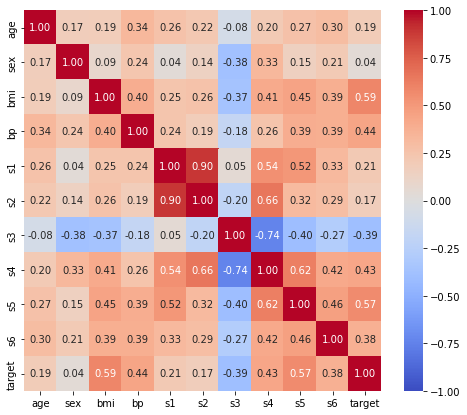

In [7]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), 
        xticklabels=df.columns,
        yticklabels=df.columns,
        vmin= -1, vmax=1.0, cmap='coolwarm',
        annot=True, fmt='.2f')
plt.show()

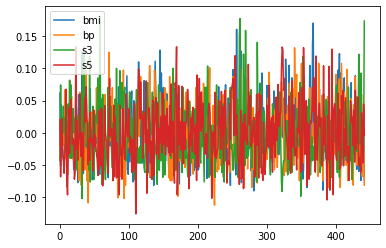

In [8]:
df[['bmi','bp','s3','s5']].plot()

<Figure size 576x576 with 0 Axes>

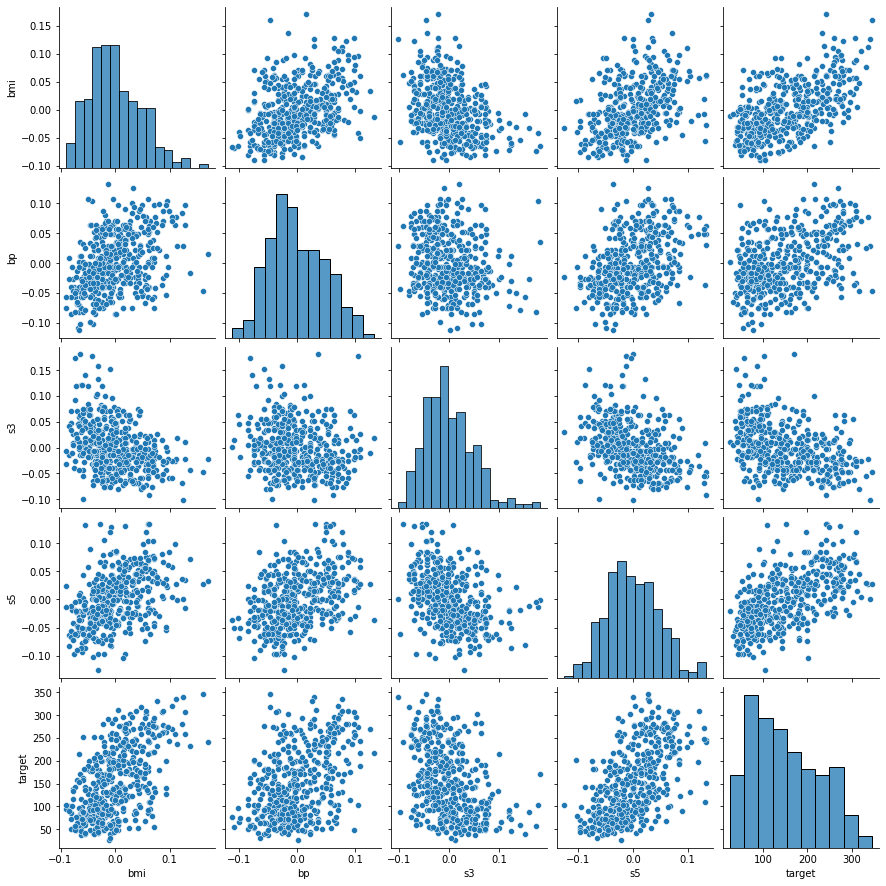

In [9]:
plt.figure(figsize=(8,8))
sns.pairplot(df[['bmi', 'bp', 's3','s5','target']])
plt.show()

---

## 데이터 구성
- train data
- test data


In [10]:
X = df[['bmi', 'bp', 's3','s5']].values
y = df[['target']].values

X.shape,y.shape, type(X),type(y)

((442, 4), (442, 1), numpy.ndarray, numpy.ndarray)

In [11]:
# target: 2d array => vector
y = np.squeeze(y, 1)
X.shape, y.shape

((442, 4), (442,))

In [40]:
# train, test data
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((353, 3), (89, 3), (353,), (89,))

## MLP model
- Sequential model
- Functional model

In [13]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

### Sequential model

In [14]:
# Sequential model
model = Sequential()
    
model.add(Dense(16, input_shape = (4,), activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'linear') ) #, activation = 'sigmoid'))
    
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )
    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


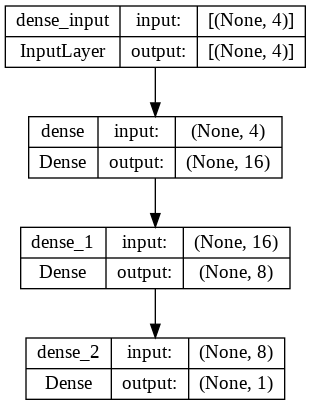

In [15]:
plot_model(model, show_shapes=True)

In [16]:
# Training
history = model.fit(X_train, y_train, 
          epochs= 200, 
          batch_size = 10,
          validation_split = 0.2, verbose=2)

Epoch 1/200
29/29 - 1s - loss: 31483.1602 - mse: 31483.1602 - val_loss: 22413.1016 - val_mse: 22413.1016 - 1s/epoch - 36ms/step
Epoch 2/200
29/29 - 0s - loss: 31391.8301 - mse: 31391.8340 - val_loss: 22327.2949 - val_mse: 22327.2949 - 75ms/epoch - 3ms/step
Epoch 3/200
29/29 - 0s - loss: 31275.6250 - mse: 31275.6250 - val_loss: 22219.6445 - val_mse: 22219.6445 - 72ms/epoch - 2ms/step
Epoch 4/200
29/29 - 0s - loss: 31126.7617 - mse: 31126.7617 - val_loss: 22080.6035 - val_mse: 22080.6035 - 83ms/epoch - 3ms/step
Epoch 5/200
29/29 - 0s - loss: 30940.1738 - mse: 30940.1738 - val_loss: 21912.2500 - val_mse: 21912.2500 - 69ms/epoch - 2ms/step
Epoch 6/200
29/29 - 0s - loss: 30718.9609 - mse: 30718.9609 - val_loss: 21713.9336 - val_mse: 21713.9336 - 95ms/epoch - 3ms/step
Epoch 7/200
29/29 - 0s - loss: 30460.7988 - mse: 30460.7988 - val_loss: 21486.7168 - val_mse: 21486.7168 - 70ms/epoch - 2ms/step
Epoch 8/200
29/29 - 0s - loss: 30159.7793 - mse: 30159.7793 - val_loss: 21220.2949 - val_mse: 2122

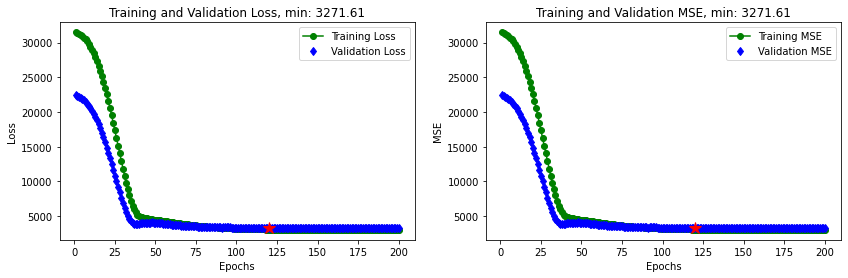

In [17]:
# Training graphs
#
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [18]:
# test 데이터에 대한 평가
loss, mse = model.evaluate(X_test, y_test, verbose=2, batch_size=10)

print("테스트 세트의 MSE: {:5.2f} ".format(mse))

9/9 - 0s - loss: 2938.3281 - mse: 2938.3281 - 25ms/epoch - 3ms/step
테스트 세트의 MSE: 2938.33 


In [19]:
# 예측
# 테스트 데이터에 있는 샘플을 사용해 target 값을 예측해 보겠습니다:
# target  a quantitative measure of disease progression one year after baseline

y_pred= model.predict(X_test, batch_size=10)  #.flatten()


9/9 [==============================] - 0s 2ms/step


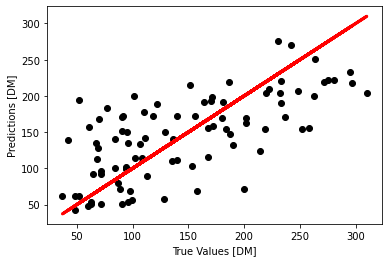

In [20]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_test, 'r', linewidth=3)
plt.xlabel('True Values [DM]')
plt.ylabel('Predictions [DM]')
# plt.axis('equal')
# plt.axis('square')
plt.show()

In [21]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

mean_squared_errors: 2938.328512186829
r2_score: 0.44540499184276594


---

### [DIY] MLP Functional model을 구성해서 분석하시오.

In [22]:
# Functional model
from keras import layers, models

inputs = layers.Input(shape=(4,))
x = Dense(16, activation='relu')(inputs)
x = Dense(8, activation='relu')(x)
output = Dense(1, activation='linear')(x)

model = models.Model(inputs=inputs, outputs=output)

optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_3 (Dense)             (None, 16)                80        
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Training
history = model.fit(X_train, y_train, 
          epochs= 200, 
          batch_size = 10,
          validation_split = 0.2, verbose=2)

Epoch 1/200
29/29 - 1s - loss: 31495.5215 - mse: 31495.5215 - val_loss: 22434.9336 - val_mse: 22434.9336 - 758ms/epoch - 26ms/step
Epoch 2/200
29/29 - 0s - loss: 31427.7695 - mse: 31427.7695 - val_loss: 22373.5352 - val_mse: 22373.5352 - 67ms/epoch - 2ms/step
Epoch 3/200
29/29 - 0s - loss: 31343.4922 - mse: 31343.4922 - val_loss: 22296.6113 - val_mse: 22296.6113 - 76ms/epoch - 3ms/step
Epoch 4/200
29/29 - 0s - loss: 31240.2266 - mse: 31240.2266 - val_loss: 22197.2715 - val_mse: 22197.2715 - 69ms/epoch - 2ms/step
Epoch 5/200
29/29 - 0s - loss: 31107.5098 - mse: 31107.5098 - val_loss: 22080.2598 - val_mse: 22080.2598 - 69ms/epoch - 2ms/step
Epoch 6/200
29/29 - 0s - loss: 30956.2012 - mse: 30956.2012 - val_loss: 21942.2969 - val_mse: 21942.2969 - 78ms/epoch - 3ms/step
Epoch 7/200
29/29 - 0s - loss: 30771.0176 - mse: 30771.0176 - val_loss: 21776.5371 - val_mse: 21776.5371 - 72ms/epoch - 2ms/step
Epoch 8/200
29/29 - 0s - loss: 30551.8574 - mse: 30551.8613 - val_loss: 21582.2969 - val_mse: 2

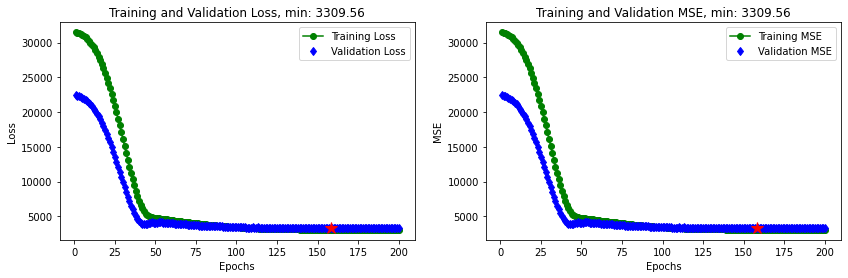

In [24]:
# Training graphs
#
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [25]:
# test 데이터에 대한 평가
loss, mse = model.evaluate(X_test, y_test, verbose=2, batch_size=10)

print("테스트 세트의 MSE: {:5.2f} ".format(mse))

9/9 - 0s - loss: 2971.0796 - mse: 2971.0796 - 25ms/epoch - 3ms/step
테스트 세트의 MSE: 2971.08 


In [26]:
# 예측
# 테스트 데이터에 있는 샘플을 사용해 target 값을 예측해 보겠습니다:
# target  a quantitative measure of disease progression one year after baseline

y_pred= model.predict(X_test, batch_size=10)  #.flatten()


9/9 [==============================] - 0s 2ms/step


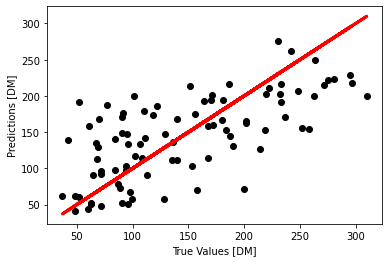

In [27]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_test, 'r', linewidth=3)
plt.xlabel('True Values [DM]')
plt.ylabel('Predictions [DM]')
# plt.axis('equal')
# plt.axis('square')
plt.show()

In [28]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

mean_squared_errors: 2971.079594389728
r2_score: 0.43922338667978267


---
[DIY] 도전해서 아래에 완성하시오.
---
## target의 값을 결정하는 중요한 특징을 변경
- 양의 상관성: bmi, bp, s5
- 반상관성 : s3

1. 양의 상관성 특징에서 bp를 제외하고 모델을 훈련
2. 양의 상관성 특징에 s4를 추가해서 모델을 훈련
3. optimizer 또는 activation 을 변경해서 모델 훈련
4. 위의 결과를 비교하는 결과 정리

---

# 1.양의 상관성 특징에서 bp를 제외하고 모델을 훈련

(442, 11)
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


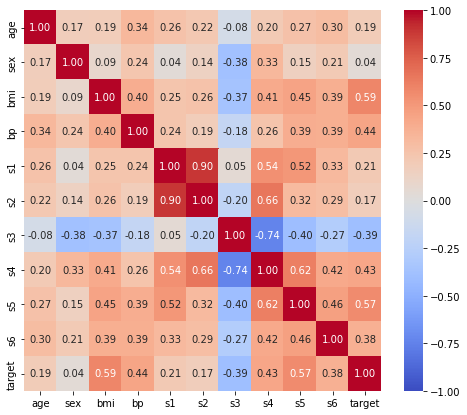

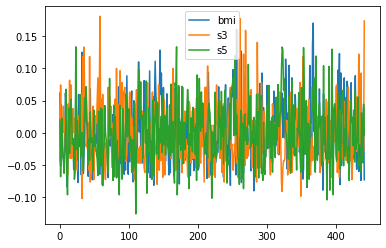

<Figure size 576x576 with 0 Axes>

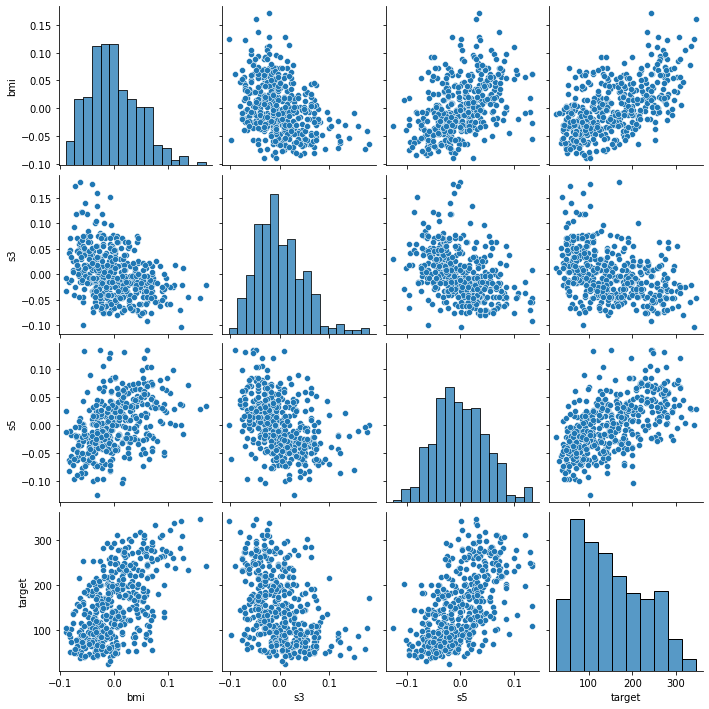

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 16)                64        
                                                                 
 dense_58 (Dense)            (None, 8)                 136       
                                                                 
 dense_59 (Dense)            (None, 1)                 9         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
29/29 - 1s - loss: 31520.0254 - mse: 31520.0254 - val_loss: 22473.5117 - val_mse: 22473.5117 - 588ms/epoch - 20ms/step
Epoch 2/200
29/29 - 0s - loss: 31497.8867 - mse: 31497.8867 - val_loss: 22449.8652 - val_mse: 22449.8633 - 82ms/epoch - 3ms/step
Epoch 3/200
29/29 - 0s - loss: 31461.6738 - mse: 31461.6738

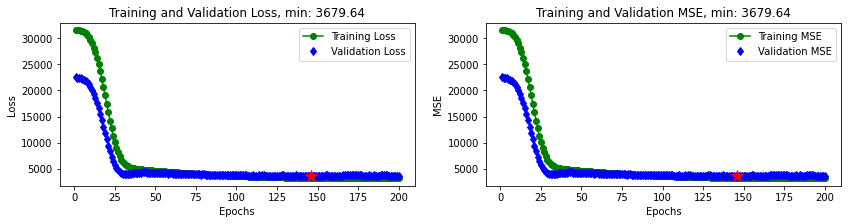

9/9 - 0s - loss: 2877.0698 - mse: 2877.0698 - 26ms/epoch - 3ms/step
테스트 세트의 MSE: 2877.07 
9/9 [==============================] - 0s 3ms/step
mean_squared_errors: 2877.0698357082547
r2_score: 0.456967264761001


In [52]:
# import
import matplotlib.pylab as plt
import numpy as np
from sklearn import datasets

df0 = datasets.load_diabetes(as_frame=True)   # data bunch
# Make dataframe from data bunch
df=df0.frame
print(df.shape)
print(df.columns)
df.head()

df.info()
df.isna().sum()
df.duplicated().sum()

import seaborn as sns
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), 
        xticklabels=df.columns,
        yticklabels=df.columns,
        vmin= -1, vmax=1.0, cmap='coolwarm',
        annot=True, fmt='.2f')
plt.show()
df[['bmi','s3','s5']].plot()
plt.figure(figsize=(8,8))
sns.pairplot(df[['bmi','s3','s5','target']])
plt.show()

X = df[['bmi','s3','s5']].values
y = df[['target']].values

X.shape,y.shape, type(X),type(y)
# target: 2d array => vector
y = np.squeeze(y, 1)
X.shape, y.shape
# train, test data
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model


# Sequential model
model = Sequential()
    
model.add(Dense(16, input_shape = (3,), activation = 'relu')) #1
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))  #, activation = 'sigmoid'))
    
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )
model.summary()

plot_model(model, show_shapes=True)

# Training
history = model.fit(X_train, y_train, 
          epochs= 200, 
          batch_size = 10,
          validation_split = 0.2, verbose=2)

# Training graphs
#
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 3))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


# test 데이터에 대한 평가
loss, mse = model.evaluate(X_test, y_test, verbose=2, batch_size=10)

print("테스트 세트의 MSE: {:5.2f} ".format(mse))

y_pred= model.predict(X_test, batch_size=10)  #.flatten()

from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

# 2. 양의 상관성 특징에 s4를 추가해서 모델을 훈련

(442, 11)
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


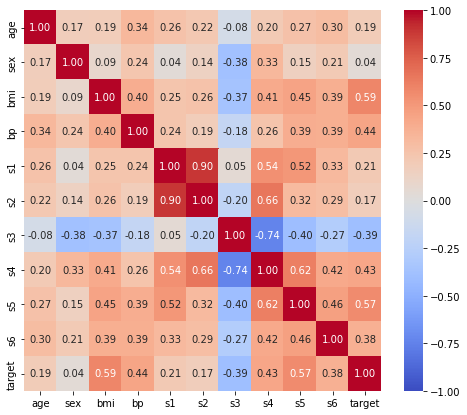

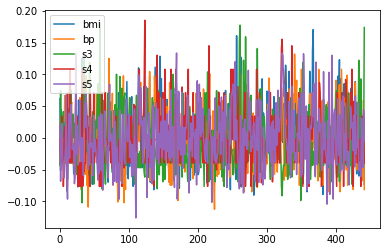

<Figure size 576x576 with 0 Axes>

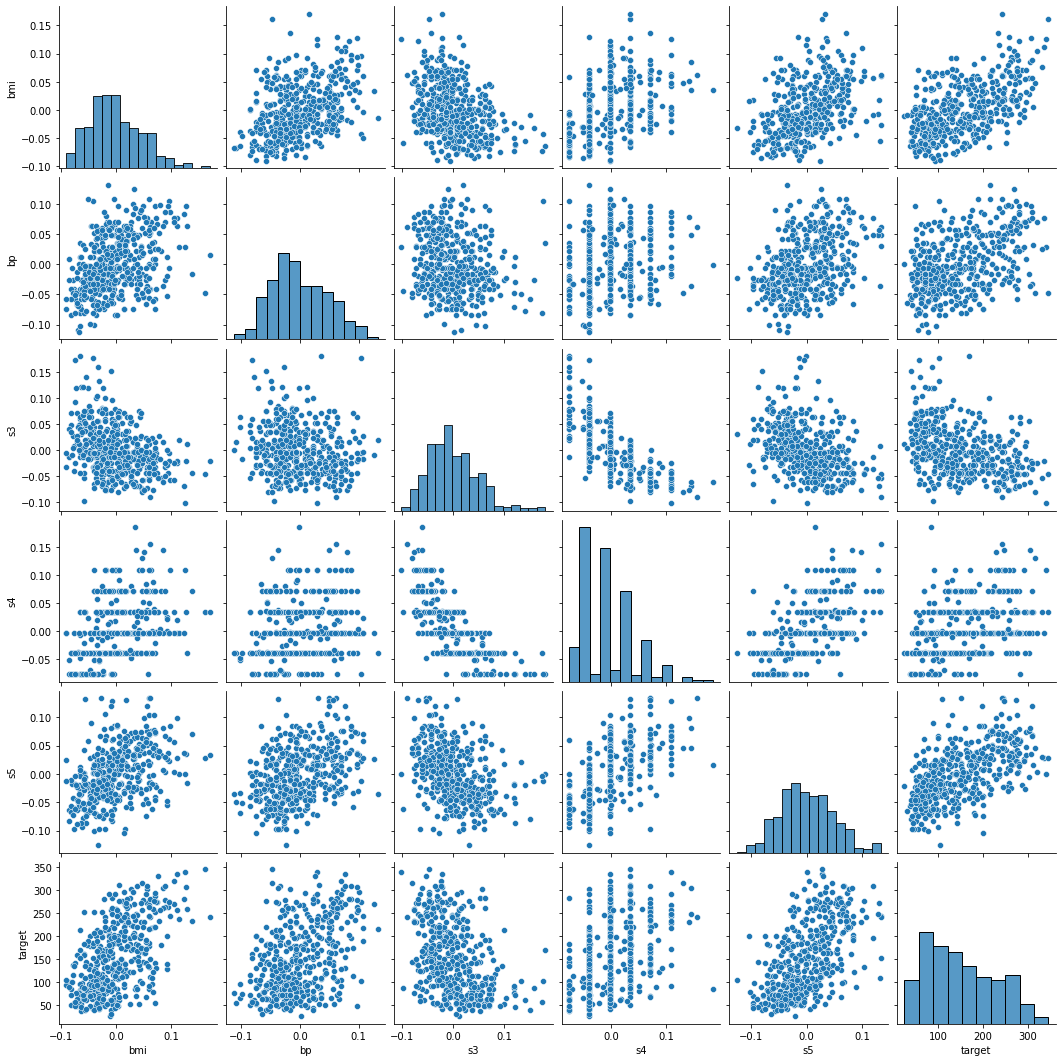

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 16)                96        
                                                                 
 dense_64 (Dense)            (None, 8)                 136       
                                                                 
 dense_65 (Dense)            (None, 1)                 9         
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
29/29 - 1s - loss: 31462.5176 - mse: 31462.5176 - val_loss: 22401.0938 - val_mse: 22401.0938 - 732ms/epoch - 25ms/step
Epoch 2/200
29/29 - 0s - loss: 31362.3047 - mse: 31362.3047 - val_loss: 22310.3184 - val_mse: 22310.3184 - 79ms/epoch - 3ms/step
Epoch 3/200
29/29 - 0s - loss: 31241.5781 - mse: 31241.5781

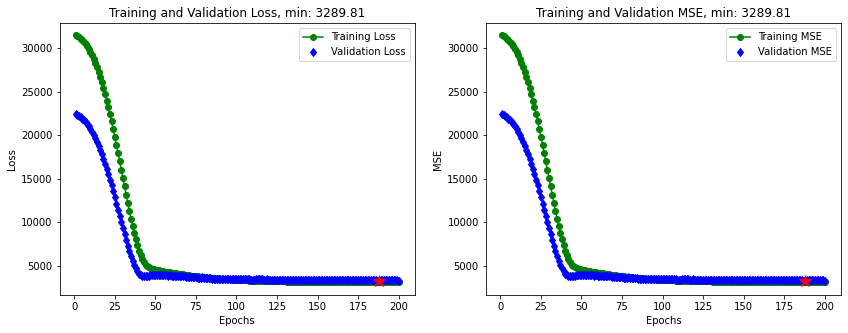

9/9 - 0s - loss: 2951.7998 - mse: 2951.7998 - 24ms/epoch - 3ms/step
테스트 세트의 MSE: 2951.80 
9/9 [==============================] - 0s 2ms/step
mean_squared_errors: 2951.7997135381
r2_score: 0.4428623690583122


In [55]:
# import
import matplotlib.pylab as plt
import numpy as np
from sklearn import datasets

df0 = datasets.load_diabetes(as_frame=True)   # data bunch
# Make dataframe from data bunch
df=df0.frame
print(df.shape)
print(df.columns)
df.head()

df.info()
df.isna().sum()
df.duplicated().sum()

import seaborn as sns
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), 
        xticklabels=df.columns,
        yticklabels=df.columns,
        vmin= -1, vmax=1.0, cmap='coolwarm',
        annot=True, fmt='.2f')
plt.show()
df[['bmi','bp','s3','s4','s5']].plot()
plt.figure(figsize=(8,8))
sns.pairplot(df[['bmi', 'bp', 's3', 's4', 's5','target']])
plt.show()

X = df[['bmi', 'bp', 's3','s4','s5']].values
y = df[['target']].values

X.shape,y.shape, type(X),type(y)
# target: 2d array => vector
y = np.squeeze(y, 1)
X.shape, y.shape
# train, test data
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model


# Sequential model
model = Sequential()
    
model.add(Dense(16, input_shape = (5,), activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))
    
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )
    
model.summary()

plot_model(model, show_shapes=True)

# Training
history = model.fit(X_train, y_train, 
          epochs= 200, 
          batch_size = 10,
          validation_split = 0.2, verbose=2)

# Training graphs
#
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


# test 데이터에 대한 평가
loss, mse = model.evaluate(X_test, y_test, verbose=2, batch_size=10)

print("테스트 세트의 MSE: {:5.2f} ".format(mse))

y_pred= model.predict(X_test, batch_size=10)  #.flatten()

from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

# 3. optimizer 또는 activation 을 변경해서 모델 훈련

(442, 11)
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


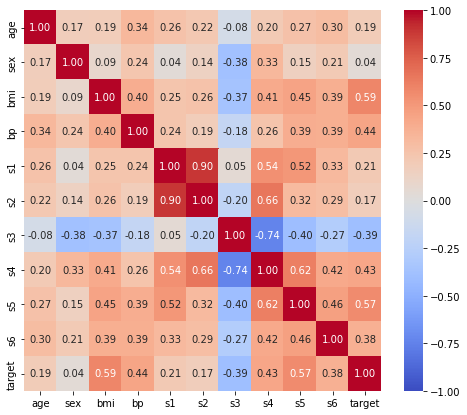

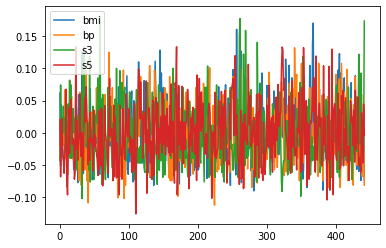

<Figure size 576x576 with 0 Axes>

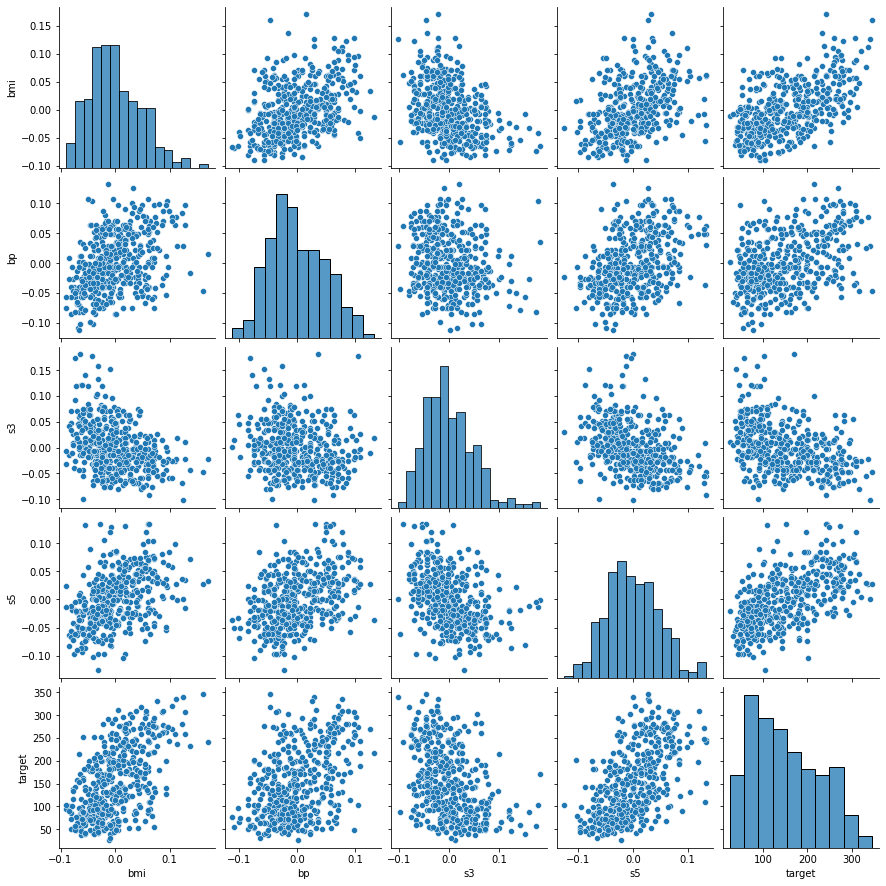

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 16)                80        
                                                                 
 dense_61 (Dense)            (None, 8)                 136       
                                                                 
 dense_62 (Dense)            (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
29/29 - 1s - loss: 31358.9434 - mse: 31358.9434 - val_loss: 22341.0137 - val_mse: 22341.0137 - 732ms/epoch - 25ms/step
Epoch 2/200
29/29 - 0s - loss: 31339.8652 - mse: 31339.8652 - val_loss: 22322.9609 - val_mse: 22322.9609 - 74ms/epoch - 3ms/step
Epoch 3/200
29/29 - 0s - loss: 31315.4258 - mse: 31315.4297

In [53]:
#import 
import matplotlib.pylab as plt
import numpy as np
from sklearn import datasets

df0 = datasets.load_diabetes(as_frame=True)   # data bunch
# Make dataframe from data bunch
df=df0.frame
print(df.shape)
print(df.columns)
df.head()

df.info()
df.isna().sum()
df.duplicated().sum()

import seaborn as sns
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), 
        xticklabels=df.columns,
        yticklabels=df.columns,
        vmin= -1, vmax=1.0, cmap='coolwarm',
        annot=True, fmt='.2f')
plt.show()
df[['bmi','bp','s3','s5']].plot()
plt.figure(figsize=(8,8))
sns.pairplot(df[['bmi', 'bp', 's3','s5','target']])
plt.show()

X = df[['bmi', 'bp', 's3','s5']].values
y = df[['target']].values

X.shape,y.shape, type(X),type(y)
# target: 2d array => vector
y = np.squeeze(y, 1)
X.shape, y.shape
# train, test data
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model


# Sequential model
model = Sequential()
    
model.add(Dense(16, input_shape = (4,), activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid') ) #, activation = 'sigmoid'))
    
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )
    
model.summary()

plot_model(model, show_shapes=True)

# Training
history = model.fit(X_train, y_train, 
          epochs= 200, 
          batch_size = 10,
          validation_split = 0.2, verbose=2)

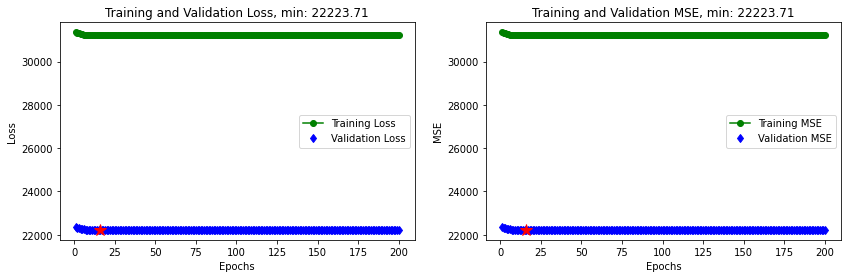

9/9 - 0s - loss: 26258.0332 - mse: 26258.0332 - 25ms/epoch - 3ms/step
테스트 세트의 MSE: 26258.03 
9/9 [==============================] - 0s 2ms/step


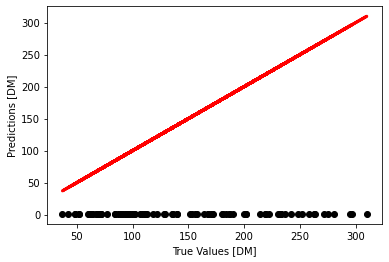

mean_squared_errors: 26258.03370786517
r2_score: -3.9560742980261


In [54]:
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

loss, mse = model.evaluate(X_test, y_test, verbose=2, batch_size=10)

print("테스트 세트의 MSE: {:5.2f} ".format(mse))

y_pred= model.predict(X_test, batch_size=10)  #.flatten()

plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_test, 'r', linewidth=3)
plt.xlabel('True Values [DM]')
plt.ylabel('Predictions [DM]')
# plt.axis('equal')
# plt.axis('square')
plt.show()

# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))